* **Name: Magnus Aghe** 
* **Student ID: 900400010** 
* **Email: m.aghe0010@student.nu.edu** 
* **Course: ANA630 PROJECT - Predicting Rental Demand for Public Bike Sharing - A Case Study of the Seoul Bike Sharing System**

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format
warnings.filterwarnings("ignore")

In [2]:
# Load the data
df = pd.read_csv("SeoulBikeData.csv", encoding= 'unicode_escape', parse_dates=[0])
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-01-12,254,0,-5.20,37,2.20,2000,-17.60,0.00,0.00,0.00,Winter,No Holiday,Yes
1,2017-01-12,204,1,-5.50,38,0.80,2000,-17.60,0.00,0.00,0.00,Winter,No Holiday,Yes
2,2017-01-12,173,2,-6.00,39,1.00,2000,-17.70,0.00,0.00,0.00,Winter,No Holiday,Yes
3,2017-01-12,107,3,-6.20,40,0.90,2000,-17.60,0.00,0.00,0.00,Winter,No Holiday,Yes
4,2017-01-12,78,4,-6.00,36,2.30,2000,-18.60,0.00,0.00,0.00,Winter,No Holiday,Yes


In [3]:
# Rename columns

df=df.rename(columns={'Temperature(°C)':'Temperature','Humidity(%)':'Humidity', 
                      'Rainfall(mm)':'Rainfall','Snowfall (cm)':'Snowfall','Wind speed (m/s)':'Wind speed',
                      'Visibility (10m)':'Visibility','Solar Radiation (MJ/m2)':'Radiation',
                      'Dew point temperature(°C)':'Dew point temperature'})

In [4]:
# Summary Statistics

df.describe()

,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Radiation,Rainfall,Snowfall
count,8760.00,8760.00,8760.00,8760.00,8760.00,8760.00,8760.00,8760.00,8760.00,8760.00
mean,704.60,11.50,12.88,58.23,1.72,1436.83,4.07,0.57,0.15,0.08
std,645.00,6.92,11.94,20.36,1.04,608.30,13.06,0.87,1.13,0.44
min,0.00,0.00,-17.80,0.00,0.00,27.00,-30.60,0.00,0.00,0.00
25%,191.00,5.75,3.50,42.00,0.90,940.00,-4.70,0.00,0.00,0.00
50%,504.50,11.50,13.70,57.00,1.50,1698.00,5.10,0.01,0.00,0.00
75%,1065.25,17.25,22.50,74.00,2.30,2000.00,14.80,0.93,0.00,0.00
max,3556.00,23.00,39.40,98.00,7.40,2000.00,27.20,3.52,35.00,8.80


There are no missing values in the dataset.

In [5]:
# Datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   8760 non-null   datetime64[ns]
 1   Rented Bike Count      8760 non-null   int64         
 2   Hour                   8760 non-null   int64         
 3   Temperature            8760 non-null   float64       
 4   Humidity               8760 non-null   int64         
 5   Wind speed             8760 non-null   float64       
 6   Visibility             8760 non-null   int64         
 7   Dew point temperature  8760 non-null   float64       
 8   Radiation              8760 non-null   float64       
 9   Rainfall               8760 non-null   float64       
 10  Snowfall               8760 non-null   float64       
 11  Seasons                8760 non-null   object        
 12  Holiday                8760 non-null   object        
 13  Fun

In [6]:
# Unique values

df.nunique().sort_values(ascending=True)

Holiday                     2
Functioning Day             2
Seasons                     4
Hour                       24
Snowfall                   51
Rainfall                   61
Wind speed                 65
Humidity                   90
Radiation                 345
Date                      365
Temperature               546
Dew point temperature     556
Visibility               1789
Rented Bike Count        2166
dtype: int64

**Preprocessing the dataset.**

In [7]:
# check for null values
df.isnull().sum()

Date                     0
Rented Bike Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind speed               0
Visibility               0
Dew point temperature    0
Radiation                0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning Day          0
dtype: int64

There are no NULL values in the dataset.

In [8]:
# change some columns to category
cols = ['Seasons','Holiday','Functioning Day']

for col in cols:
    df[col] = df[col].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   8760 non-null   datetime64[ns]
 1   Rented Bike Count      8760 non-null   int64         
 2   Hour                   8760 non-null   int64         
 3   Temperature            8760 non-null   float64       
 4   Humidity               8760 non-null   int64         
 5   Wind speed             8760 non-null   float64       
 6   Visibility             8760 non-null   int64         
 7   Dew point temperature  8760 non-null   float64       
 8   Radiation              8760 non-null   float64       
 9   Rainfall               8760 non-null   float64       
 10  Snowfall               8760 non-null   float64       
 11  Seasons                8760 non-null   category      
 12  Holiday                8760 non-null   category      
 13  Fun

**Exploratory Data Analysis**

[Text(0.5, 1.0, 'Count of rented bikes during seasons')]

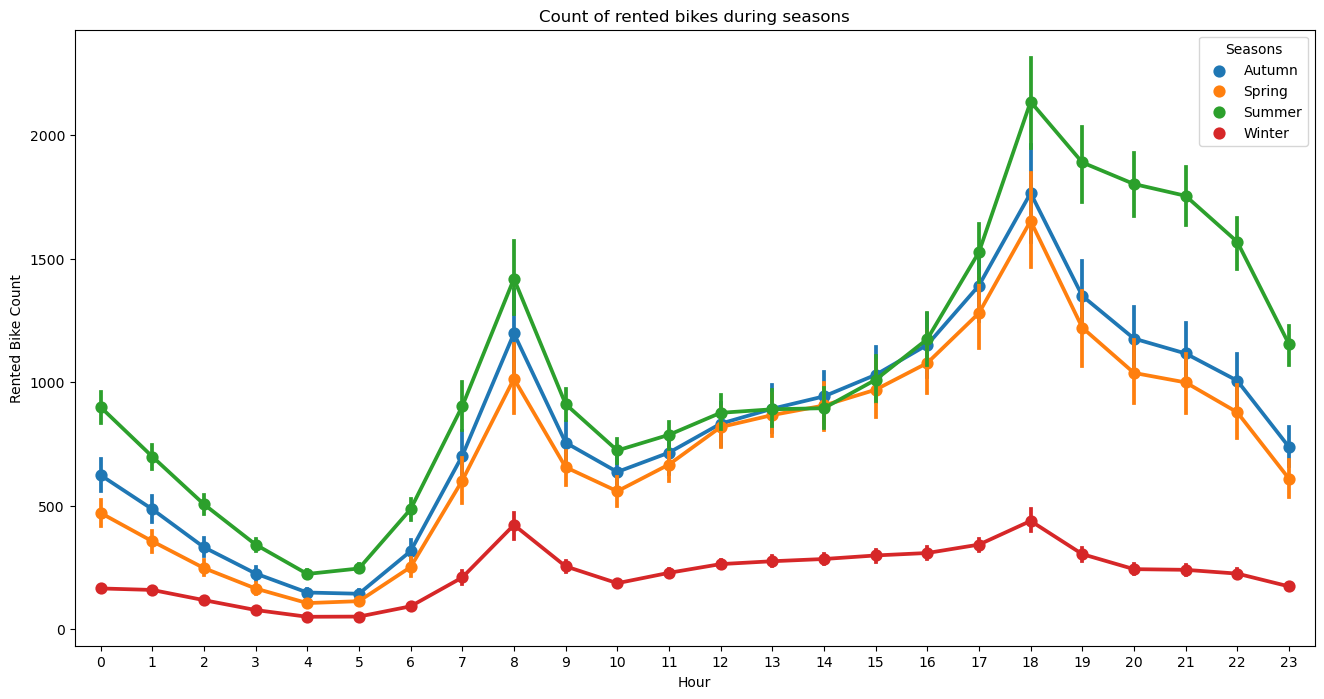

In [9]:
# Count of rented bikes during a given day across seasons

fig, ax = plt.subplots(figsize=(16,8))
sns.pointplot(data=df, x='Hour', y='Rented Bike Count', hue='Seasons', ax=ax)
ax.set(title='Count of rented bikes during seasons')

Across all seasons we observe peak bike rental demands at 18:00 hours for any given day, with the demand much higher during the summer and lowest across peaks during the winter. Spring, Summer and Autumn show similar graph pattern unlike Winter.

[Text(0.5, 1.0, 'Count of rented bikes during holiday/non-holidays')]

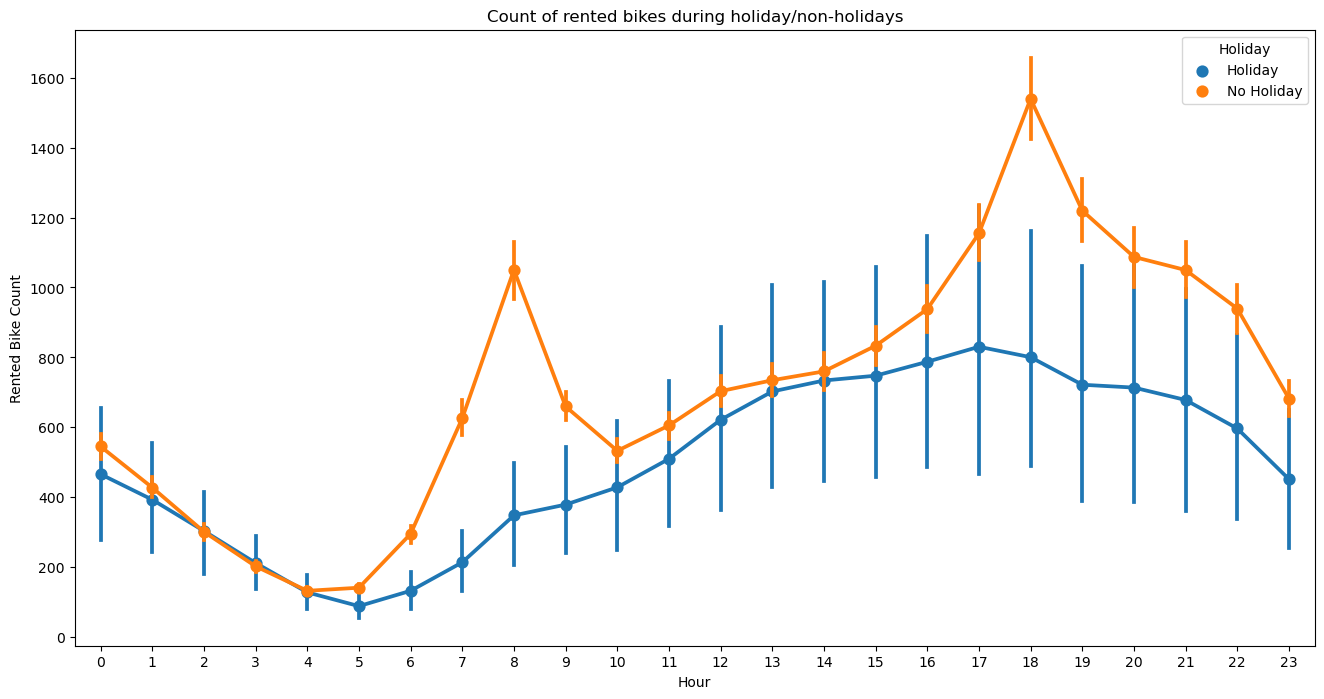

In [10]:
# Count of rented bikes during a given day across Holidays or non-Holidays

fig, ax = plt.subplots(figsize=(16,8))
sns.pointplot(data=df, x='Hour', y='Rented Bike Count', hue='Holiday', ax=ax)
ax.set(title='Count of rented bikes during holiday/non-holidays')

There seem to be more demand for rented bikes during non-holidays than during holidays.

[Text(0.5, 1.0, 'Count of rented bikes during functioning days')]

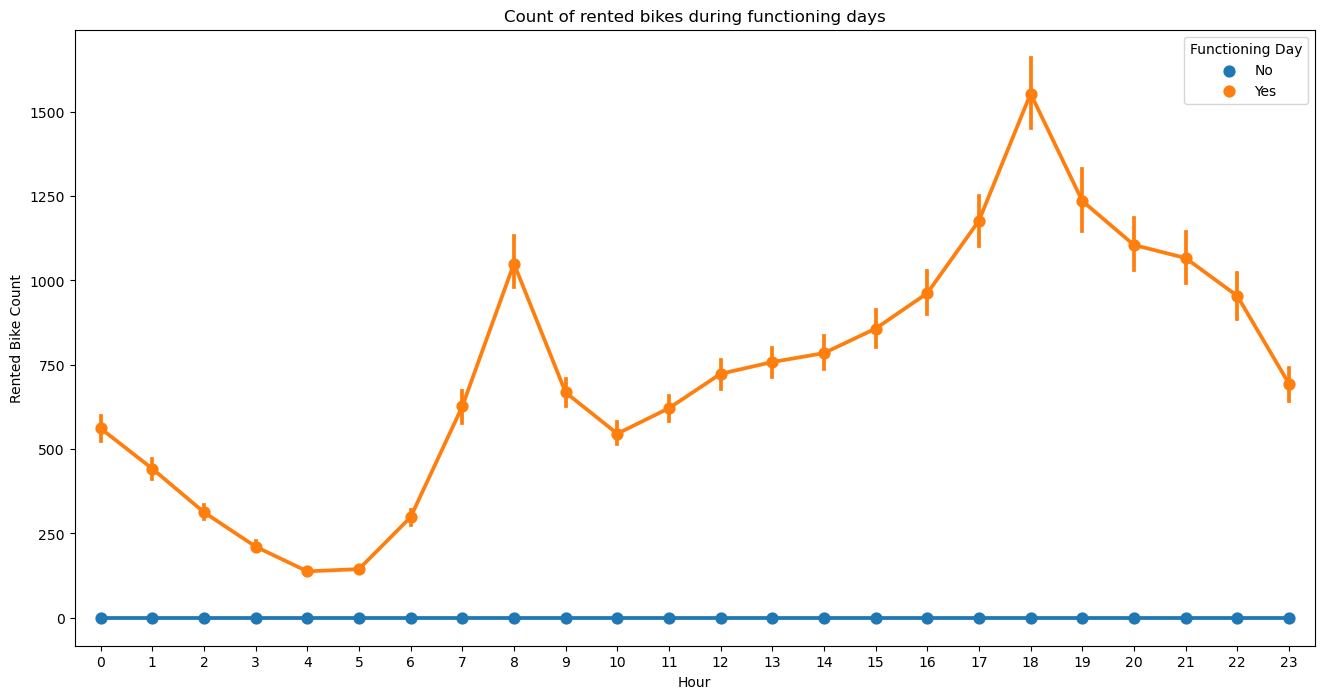

In [11]:
# Count of rented bikes during a given day across functioning days 
fig, ax = plt.subplots(figsize=(16,8))
sns.pointplot(data=df, x='Hour', y='Rented Bike Count', hue='Functioning Day', ax=ax)
ax.set(title='Count of rented bikes during functioning days')

There is zero demand across non-functioning days. All demand is experienced during functioning days.

In [12]:
# Checking Season Column Data

df.groupby("Seasons").count() 

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Radiation,Rainfall,Snowfall,Holiday,Functioning Day
Seasons,,,,,,,,,,,,,
Autumn,2184,2184,2184,2184,2184,2184,2184,2184,2184,2184,2184,2184,2184
Spring,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208
Summer,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208,2208
Winter,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160,2160


The spread of number of observations  in the dataset is fairly uniform across seasons. There were slightly more Spring and Summer days than Autumn and Winter, with Spring and Summer having equal number of observations (2208 each), and Winter (2160) having the least number of observations.

**Data Visualization**

Now we shall observe the hours distribution bar plot of each quantitative variable. 

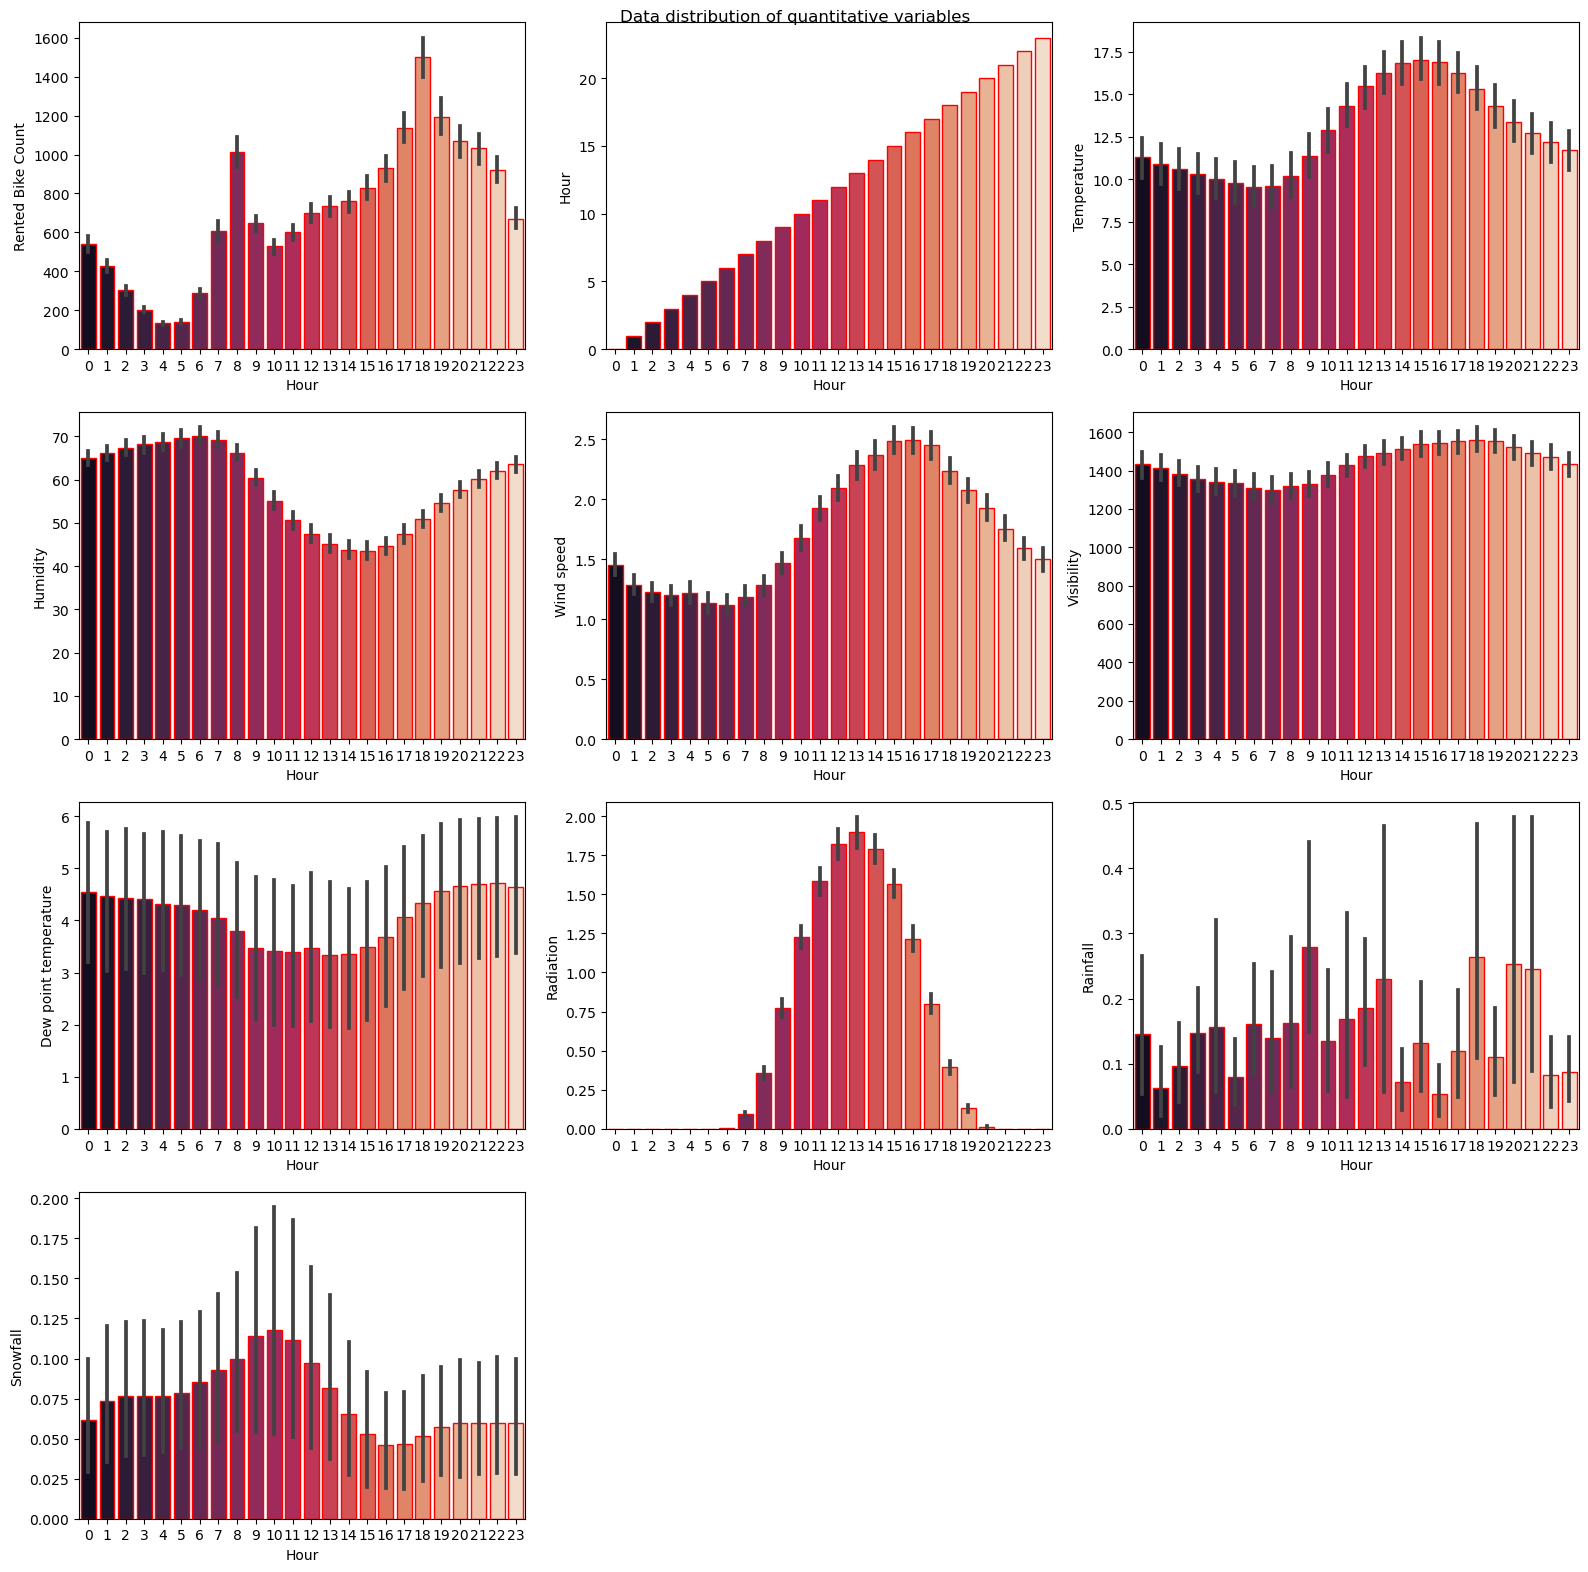

In [13]:
# Bar plot distribution of quantitative variables

plt.figure(figsize=(16, 16))
for i, col in enumerate(df.select_dtypes(include=['float64','int']).columns):
    plt.rcParams['axes.facecolor'] = 'white'
    ax = plt.subplot(4,3, i+1)
    sns.barplot(data=df,x='Hour', y=col, ax=ax,edgecolor="red",palette='rocket')
plt.suptitle('Data distribution of quantitative variables')
plt.tight_layout()

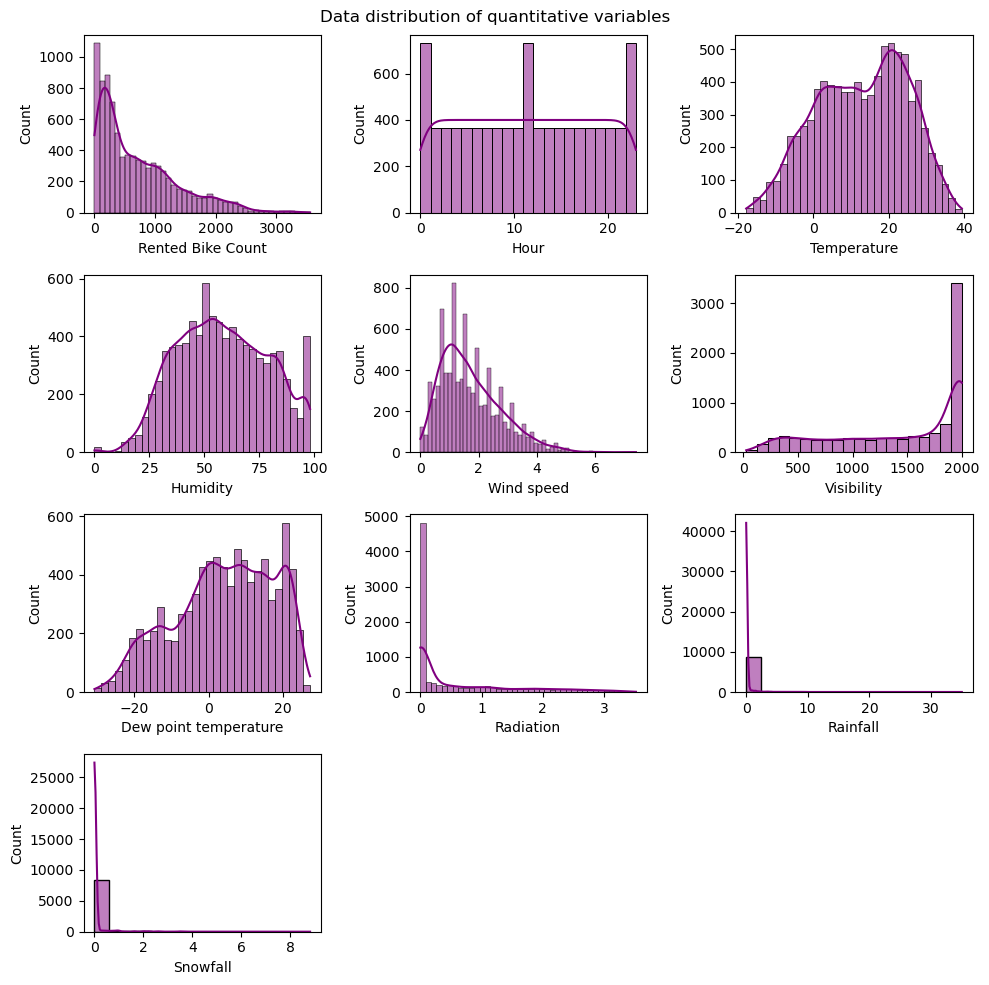

In [14]:
# Let's look at the histogram plots also.

plt.figure(figsize=(10, 10))
for i, col in enumerate(df.select_dtypes(include=['float64','int64']).columns):
    plt.rcParams['axes.facecolor'] = 'white'
    ax = plt.subplot(4,3, i+1)
    sns.histplot(data=df, x=col, ax=ax,color='purple',kde=True)
plt.suptitle('Data distribution of quantitative variables')
plt.tight_layout()

In [15]:
df.agg(['skew', 'kurtosis']).transpose()

,skew,kurtosis
Rented Bike Count,1.15,0.85
Hour,0.00,-1.20
Temperature,-0.20,-0.84
Humidity,0.06,-0.80
Wind speed,0.89,0.73
Visibility,-0.70,-0.96
Dew point temperature,-0.37,-0.76
Radiation,1.50,1.13
Rainfall,14.53,284.99
Snowfall,8.44,93.80


From the histograms and calculated figures above, we can see that both positively and negatively skewed distributions exist in the dataset. 

Since most of the predictor variables are not normally distributed, we have to transform the variables

**Power Transformation**

In [16]:
#selecting variables that have data types float and int.

var=list(df.select_dtypes(include=['float64','int64']).columns)

In [17]:
from sklearn.preprocessing import PowerTransformer
sc_X=PowerTransformer(method = 'yeo-johnson')
df[var]=sc_X.fit_transform(df[var])

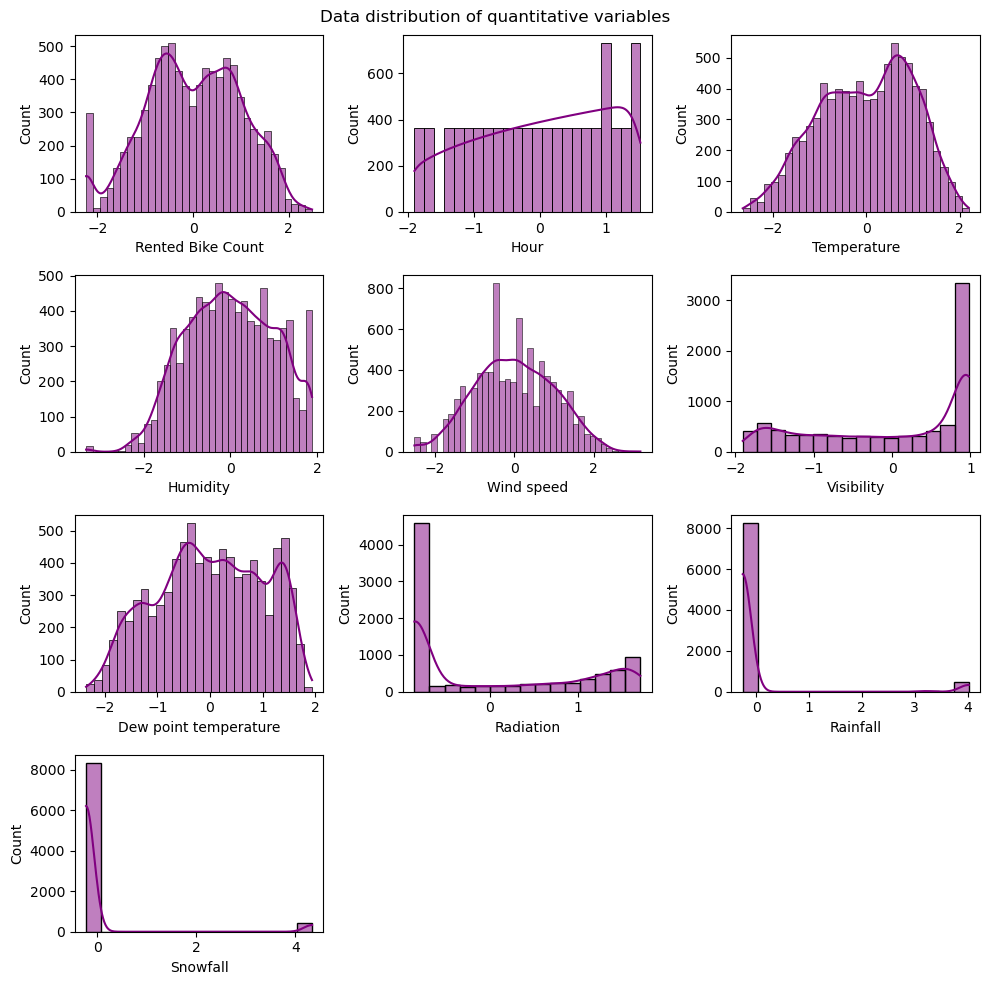

In [18]:
plt.figure(figsize=(10, 10))
for i, col in enumerate(df.select_dtypes(include=['float64','int64']).columns):
    plt.rcParams['axes.facecolor'] = 'white'
    ax = plt.subplot(4,3, i+1)
    sns.histplot(data=df, x=col, ax=ax,color='purple',kde=True)
plt.suptitle('Data distribution of quantitative variables')
plt.tight_layout()

The distribution plots look more symmetrical after applying power transformer.

**Correlation Analysis**

<Axes: >

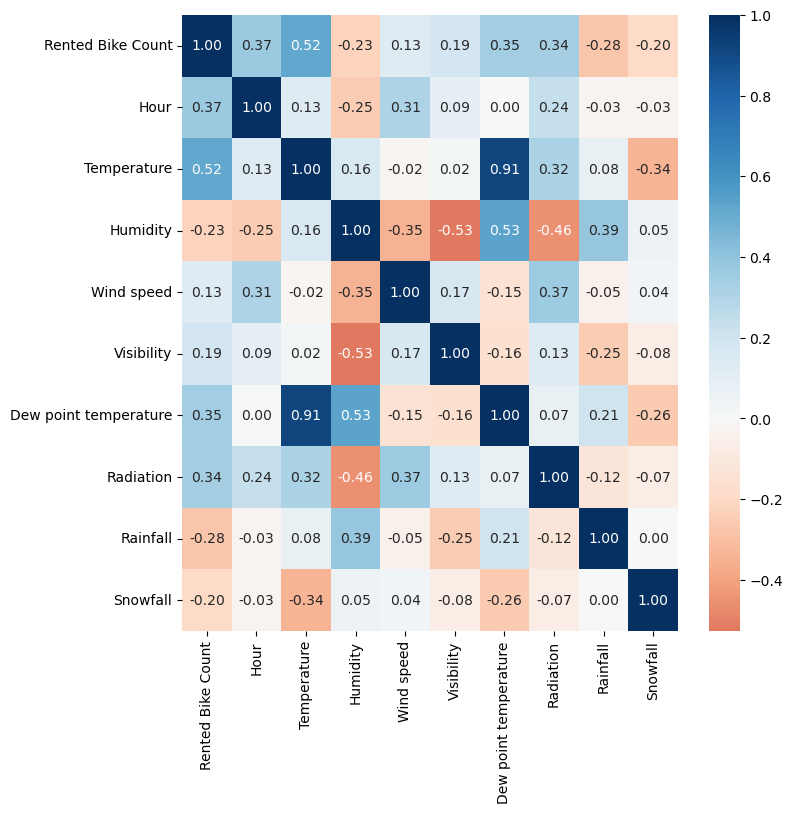

In [19]:
corr = df.select_dtypes(include=['float']).corr()
fig, ax = plt.subplots()
fig.set_size_inches(8, 8)
sns.heatmap(corr, annot=True, fmt=".2f", cmap="RdBu", center=0, ax=ax)

From the correlation analysis, we see that Temperature is the most correlated with Rented Bike Count. Hour, Dew point temperature and Radiation are also quite strongly correlated with Rented Bike Count. 

Amongst the predictor variables, we see high collinearity between Temperature and Dew point temperature (0.91). This suggests we might remove Dew point temperature from the list of predictor variables.

**Analyzing Categorical Variables**

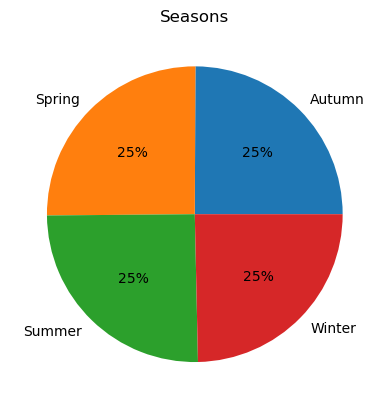

In [20]:
season_var=pd.crosstab(index=df['Seasons'],columns='% observations')
plt.pie(season_var['% observations'],labels=season_var['% observations'].index,autopct='%.0f%%')
plt.title('Seasons')
plt.show()

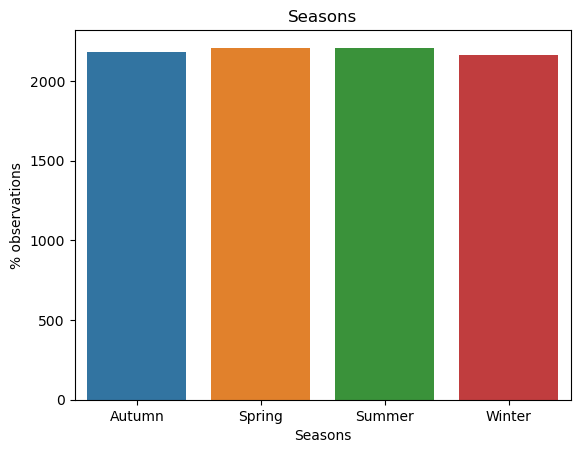

In [21]:
sns.barplot(x=season_var.index,y=season_var['% observations'])
plt.title('Seasons')
plt.show()

The distribution of Seasons is balanced across its categories.

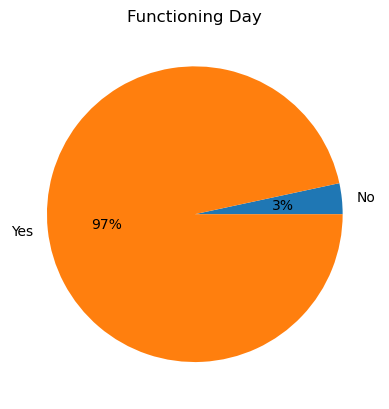

In [22]:
Functioning_Day_var=pd.crosstab(index=df['Functioning Day'],columns='% observations')
plt.pie(Functioning_Day_var['% observations'],labels=Functioning_Day_var['% observations'].index,autopct='%.0f%%')
plt.title('Functioning Day')
plt.show()

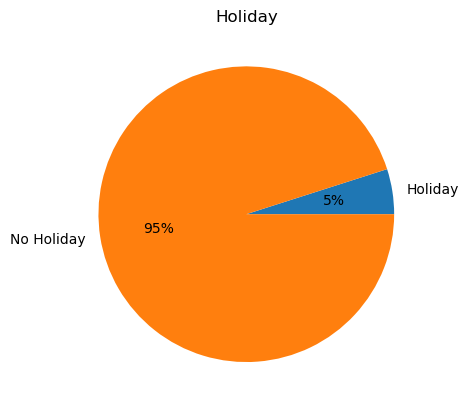

In [23]:
holiday_var=pd.crosstab(index=df['Holiday'],columns='% observations')
plt.pie(holiday_var['% observations'],labels=holiday_var['% observations'].index,autopct='%.0f%%')
plt.title('Holiday')
plt.show()

**Coding for dummy variables**

In [24]:
df = pd.get_dummies(df, columns = ['Holiday', 'Seasons', 'Functioning Day'], drop_first = True)

In [35]:
df1=df.drop('Date', axis=1)

In [36]:
X=df1.drop('Rented Bike Count', axis=1)
y=df1['Rented Bike Count']

**Identifying Input Variables and Target Variable**

**Feature Selection Technique: Variance Inflation Factor**

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [38]:
calc_vif(X.select_dtypes(include=['float','int']))

,variables,VIF
0,Hour,1.18
1,Temperature,46.03
2,Humidity,12.03
3,Wind speed,1.30
4,Visibility,1.56
5,Dew point temperature,60.39
6,Radiation,1.86
7,Rainfall,1.20
8,Snowfall,1.17


Dew point temperature is the most highly correlated as seen above. Let's check VIF score again after deleting Dew point temperature.

In [39]:
# Delete Dew point temperature
del X['Dew point temperature']

In [40]:
calc_vif(X.select_dtypes(include=['float','int']))

,variables,VIF
0,Hour,1.18
1,Temperature,1.60
2,Humidity,2.52
3,Wind speed,1.30
4,Visibility,1.50
5,Radiation,1.83
6,Rainfall,1.20
7,Snowfall,1.16


Here we see that every variable has a VIF score between 1 and 3, which shows they are moderately correlated, and are thus good candidates for predictor variables. 

In [41]:
#Feature Selection

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression#Correlation

In [42]:
fs = SelectKBest(score_func=f_regression, k='all')
fs.fit(X, y)

SelectKBest(k='all', score_func=<function f_regression at 0x000001D7B6B30820>)

In [43]:
feature_contribution=(fs.scores_/sum(fs.scores_))*100

**Feature Importance Graph**

Hour : 11.20%
Temperature : 26.02%
Humidity : 3.79%
Wind speed : 1.25%
Visibility : 2.61%
Radiation : 9.19%
Rainfall : 6.08%
Snowfall : 2.85%
Holiday_No Holiday : 0.57%
Seasons_Spring : 0.07%
Seasons_Summer : 7.48%
Seasons_Winter : 14.02%
Functioning Day_Yes : 14.88%


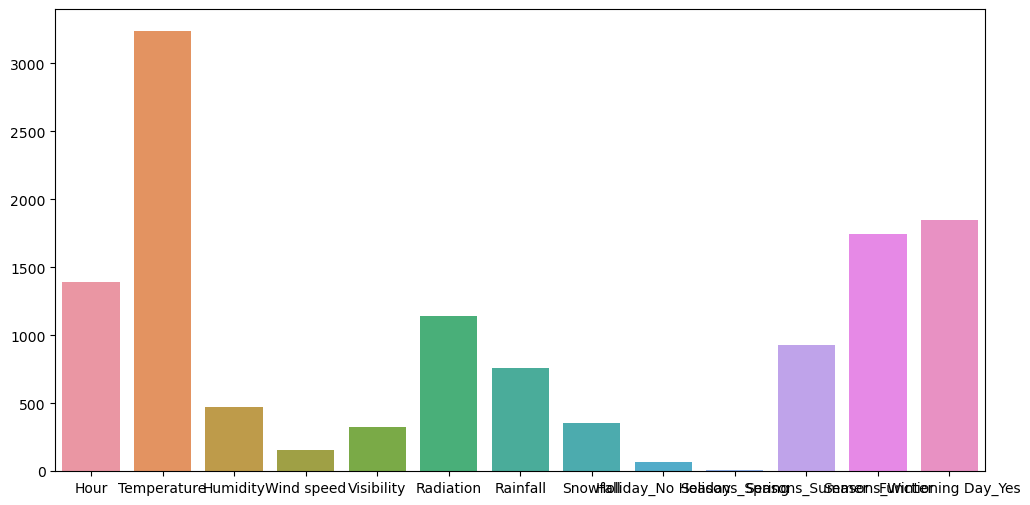

In [44]:
for i,j in enumerate(X.columns):
    print(f'{j} : {feature_contribution[i]:.2f}%')
plt.figure(figsize=(12,6))
sns.barplot(x=X.columns,y=fs.scores_)
plt.show()

**Splitting our dataset into training and test set**

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
#splitting our dataset in 70% training and 30% testset
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=0)

**Feature Scaling/Normalization**

In [47]:
# We shall use Normalization.

from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [50]:
scaler = MinMaxScaler()
norm_df = pd.DataFrame(scaler.fit_transform(df1),
                       index=df1.index, columns=df1.columns)

In [51]:
norm_df

,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Radiation,Rainfall,Snowfall,Holiday_No Holiday,Seasons_Spring,Seasons_Summer,Seasons_Winter,Functioning Day_Yes
0,0.36,0.00,0.23,0.44,0.55,1.00,0.19,0.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00
1,0.33,0.07,0.23,0.45,0.28,1.00,0.19,0.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00
2,0.31,0.14,0.22,0.46,0.33,1.00,0.18,0.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00
3,0.25,0.19,0.21,0.47,0.30,1.00,0.19,0.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00
4,0.22,0.25,0.22,0.43,0.56,1.00,0.17,0.00,0.00,0.00,1.00,0.00,0.00,1.00,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,0.62,0.86,0.40,0.41,0.61,0.93,0.29,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00
8756,0.56,0.90,0.38,0.44,0.56,1.00,0.30,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00
8757,0.54,0.93,0.37,0.46,0.13,0.98,0.30,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00
8758,0.54,0.97,0.36,0.48,0.33,0.90,0.30,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00


In [52]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

**Modeling**

In [53]:
# Performance measures for Regression

#importing different Regression models
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import cross_val_score

In [54]:
#creating dictionary for storing different models accuracy

model_comparison={}

**Linear Regression**

In [77]:
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(f"Model R-Square : {r2_score(y_test,y_pred)*100:.2f}%")
print(f"Model MSE : {mean_squared_error(y_test,y_pred)*100:.2f}%")
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
model_comparison['Linear Regression']=[r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred),
                                       (accuracies.mean()),(accuracies.std())]

Model R-Square : 70.67%
Model MSE : 29.22%
Cross Val Accuracy: 70.99 %
Cross Val Standard Deviation: 0.49 %


**Linear Regression Summary**

In [56]:
import statsmodels.api as sm
lin_reg=sm.OLS(y_train,X_train).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      Rented Bike Count   R-squared (uncentered):                   0.626
Model:                            OLS   Adj. R-squared (uncentered):              0.625
Method:                 Least Squares   F-statistic:                              787.1
Date:                Thu, 27 Jul 2023   Prob (F-statistic):                        0.00
Time:                        16:07:49   Log-Likelihood:                         -5691.6
No. Observations:                6132   AIC:                                  1.141e+04
Df Residuals:                    6119   BIC:                                  1.150e+04
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.8078      0.029     27.522      0.000       0.750       0.865
x2             0.5539      0.075      7.369      0.000       0.407       0.701
x3            -2.1953      0.053    -41.182      0.000      -2.300      -2.091
x4            -0.3408      0.051     -6.747      0.000      -0.440      -0.242
x5            -0.4559      0.025    -17.972      0.000      -0.506      -0.406
x6            -0.0634      0.027     -2.357      0.018      -0.116      -0.011
x7            -0.9940      0.037    -27.052      0.000      -1.066      -0.922
x8             0.0249      0.039      0.632      0.527      -0.052       0.102
x9            -0.2843      0.034     -8.293      0.000      -0.352      -0.217
x10           -0.3159      0.023    -13.580      0.000      -0.362      -0.270
x11            0.1680      0.027      6.211      0.000       0.115       0.221
x12           -1.2118      0.030    -41.037      0.000      -1.270      -1.154
x13            1.8804      0.041     45.981      0.000       1.800       1.961
==============================================================================
Omnibus:                        9.106   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                9.095
Skew:                           0.087   Prob(JB):                       0.0106
Kurtosis:                       3.072   Cond. No.                         21.8
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Assumptions of Linear Regression**

In [57]:
residuals = lin_reg.resid
fitted_value=lin_reg.fittedvalues

In [58]:
np.mean(residuals)

-0.02357074432992103

**Checking for normality of the residuals**

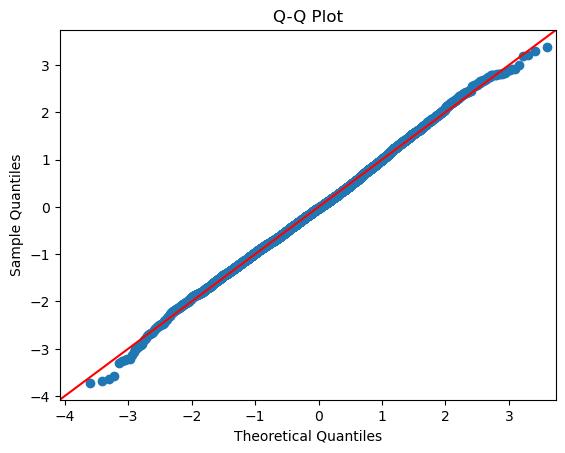

In [59]:
sm.qqplot(residuals,fit=True,line='45')
plt.title('Q-Q Plot')
plt.show()

**Checking for homoscedasticity**

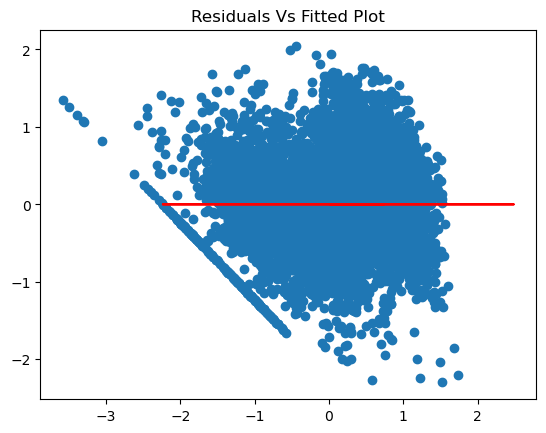

In [60]:
plt.scatter(fitted_value, residuals)
plt.plot(y_train, [0]*len(y_train),c='r')
plt.title('Residuals Vs Fitted Plot')
plt.show()

**Polynomial Regression**

In [61]:
poly_reg=PolynomialFeatures(degree=2)
model=LinearRegression()
model.fit(poly_reg.fit_transform(X_train),y_train)
y_pred=model.predict(poly_reg.fit_transform(X_test))
print(f"Model R-Square : {r2_score(y_test,y_pred)*100:.2f}%")
print(f"Model MSE : {mean_squared_error(y_test,y_pred)*100:.2f}%")
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
model_comparison['Polynomial Regression']=[r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred),
                                           (accuracies.mean()),(accuracies.std())]

Model R-Square : 80.16%
Model MSE : 19.76%
Cross Val Accuracy: 70.99 %
Cross Val Standard Deviation: 0.49 %


**Decision Tree Regression**

In [62]:
model=DecisionTreeRegressor()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(f"Model R-Square : {r2_score(y_test,y_pred)*100:.2f}%")
print(f"Model MSE : {mean_squared_error(y_test,y_pred)*100:.2f}%")
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
model_comparison['Decision Tree Regression']=[r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred),
                                              (accuracies.mean()),(accuracies.std())]

Model R-Square : 81.36%
Model MSE : 18.56%
Cross Val Accuracy: 80.60 %
Cross Val Standard Deviation: 1.38 %


**Random Forest Regression**

In [63]:
model=RandomForestRegressor(n_estimators=10,random_state=0)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(f"Model R-Square : {r2_score(y_test,y_pred)*100:.2f}%")
print(f"Model MSE : {mean_squared_error(y_test,y_pred)*100:.2f}%")
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
model_comparison['Random forest Regression']=[r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred),
                                              (accuracies.mean()),(accuracies.std())]

Model R-Square : 89.02%
Model MSE : 10.94%
Cross Val Accuracy: 88.90 %
Cross Val Standard Deviation: 0.69 %


**Bagging Regressor**

In [64]:
from sklearn.ensemble import BaggingRegressor
model= BaggingRegressor(RandomForestRegressor(n_estimators=10,random_state=0),random_state=0)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
print(f"Model R-Square : {r2_score(y_test,y_pred)*100:.2f}%")
print(f"Model MSE : {mean_squared_error(y_test,y_pred)*100:.2f}%")
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
model_comparison['Bagging Regressor']=[r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred),
                                       (accuracies.mean()),(accuracies.std())]

Model R-Square : 89.38%
Model MSE : 10.57%
Cross Val Accuracy: 89.73 %
Cross Val Standard Deviation: 0.54 %


**Stacking Regressor**

In [65]:
estimators=[('linear regression',LinearRegression()),('Decision Tree',DecisionTreeRegressor()),
            ('random forest',RandomForestRegressor(n_estimators=10,random_state=0)),
            ('bagging',BaggingRegressor(RandomForestRegressor(n_estimators=10,random_state=0),random_state=0))]

In [66]:
model=StackingRegressor(estimators=estimators,final_estimator=LinearRegression(),passthrough=True)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
print(f"Model R-Square : {r2_score(y_test,y_pred)*100:.2f}%")
print(f"Model MSE : {mean_squared_error(y_test,y_pred)*100:.2f}%")
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
model_comparison['Stacking Regressor']=[r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred),
                                        (accuracies.mean()),(accuracies.std())]

Model R-Square : 89.56%
Model MSE : 10.40%
Cross Val Accuracy: 89.88 %
Cross Val Standard Deviation: 0.49 %


**Model Comparison**

In [70]:
Model_com_df=pd.DataFrame(model_comparison).T
Model_com_df.columns=['R-Square','MSE','CV Accuracy','CV std']
Model_com_df=Model_com_df.sort_values(by='R-Square',ascending=False)
Model_com_df.style.format("{:.2%}").background_gradient(cmap='RdBu')

,R-Square,MSE,CV Accuracy,CV std
Stacking Regressor,89.56%,10.40%,89.88%,0.49%
Bagging Regressor,89.38%,10.57%,89.73%,0.54%
Random forest Regression,89.02%,10.94%,88.90%,0.69%
Decision Tree Regression,81.36%,18.56%,80.60%,1.38%
Polynomial Regression,80.16%,19.76%,70.99%,0.49%
Linear Regression,70.67%,29.22%,70.99%,0.49%


**Maximum Accuracies in each Column**

In [71]:
Model_com_df.style.highlight_max().set_caption("Maximum Score in each Column").format("{:.2%}")

,R-Square,MSE,CV Accuracy,CV std
Stacking Regressor,89.56%,10.40%,89.88%,0.49%
Bagging Regressor,89.38%,10.57%,89.73%,0.54%
Random forest Regression,89.02%,10.94%,88.90%,0.69%
Decision Tree Regression,81.36%,18.56%,80.60%,1.38%
Polynomial Regression,80.16%,19.76%,70.99%,0.49%
Linear Regression,70.67%,29.22%,70.99%,0.49%


**Minimum Accuracies in each Column**

In [72]:
Model_com_df.style.highlight_min().set_caption("Minimum Score in each Column").format("{:.2%}")

,R-Square,MSE,CV Accuracy,CV std
Stacking Regressor,89.56%,10.40%,89.88%,0.49%
Bagging Regressor,89.38%,10.57%,89.73%,0.54%
Random forest Regression,89.02%,10.94%,88.90%,0.69%
Decision Tree Regression,81.36%,18.56%,80.60%,1.38%
Polynomial Regression,80.16%,19.76%,70.99%,0.49%
Linear Regression,70.67%,29.22%,70.99%,0.49%
